In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
file=('2011teachingfile.csv')
df= pd.read_csv(file, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,For terms and conditions of use visit: http://...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
2,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
3,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
4,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4


In [4]:
df_small=df.drop(axis=0, index=0)
df_small.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
2,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
3,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
4,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
5,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2


In [5]:
df_small.columns=['Person ID', 'Region', 'Residence Type', 'Family Composition', 'Population Base', 'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health', 'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week', 'Approximated Social Grade']
df_small.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
1,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
2,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
3,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
4,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
5,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2


In [6]:
df_Small= df_small.drop(axis=0, index=1)
df_Small.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
2,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
3,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
4,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
5,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
6,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


In [7]:
df_Small.describe()


,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
count,417962,417962,417962,417962,417962,417962,417962,417962,417962,417962,417962,417962,417962,417962,417962,417962,417962,417961
unique,417962,8,1,14,6,4,16,10,4,6,12,12,20,20,20,26,11,10
top,7394816,E12000008,H,2,1,2,1,1,2,1,1,1,2,1,-9,-9,-9,2
freq,1,86091,417962,214125,379728,195628,72247,174719,303989,344166,178468,346769,236129,149429,96016,96016,186728,109763


In [8]:
freq=df_Small['Residence Type'].value_counts()
print(freq)

H    417962
Name: Residence Type, dtype: int64


In [9]:
freq2=df_Small['Family Composition'].value_counts()
print(freq2)

2     214125
1      63180
3      51243
5      41162
2      16899
4       6570
1       5775
-9      5518
3       4540
5       4214
6       3398
4        601
-9       415
6        322
Name: Family Composition, dtype: int64


In [10]:
freq3=df_Small['Population Base'].value_counts()
print(freq3)
               

1    379728
1     32353
2      4720
3       748
2       329
3        84
Name: Population Base, dtype: int64


In [11]:
freq4=df_Small['Sex'].value_counts()
print(freq4)

2    195628
1    189568
2     16563
1     16203
Name: Sex, dtype: int64


In [12]:
freq5=df_Small['Age'].value_counts()
print(freq5)

1    72247
5    54130
4    53028
6    47262
3    46821
2    45958
7    35717
8    30033
1     6219
5     4597
2     4441
4     4432
3     4204
6     3962
7     2691
8     2220
Name: Age, dtype: int64


In [13]:
freq6=df_Small['Marital Status'].value_counts()
print(freq6)

1    174719
2    152627
4     28630
5     21334
1     15709
2     12051
3      7886
4      2558
5      1752
3       696
Name: Marital Status, dtype: int64


In [14]:
freq7=df_Small['Student'].value_counts()
print(freq7)

2    303989
1     81207
2     25371
1      7395
Name: Student, dtype: int64


In [15]:
freq8=df_Small['Country of Birth'].value_counts()
print(freq8)

1     344166
2      36260
1      29101
-9      4770
2       3334
-9       331
Name: Country of Birth, dtype: int64


In [16]:
freq9=df_Small['Health'].value_counts()
print(freq9)

1     178468
2     131286
3      50315
4      15882
1      14682
2      11256
-9      4770
3       4503
5       4475
4       1579
5        415
-9       331
Name: Health, dtype: int64


In [17]:
freq10=df_Small['Ethnic Group'].value_counts()
print(freq10)

1     346769
1      28347
3      19184
2       6348
4       6008
-9      4770
3       2718
5       2117
2        577
4        561
-9       331
5        232
Name: Ethnic Group, dtype: int64


In [18]:
freq11=df_Small['Religion'].value_counts()
print(freq11)

2     236129
1      97451
9      26448
2      19328
6      11662
1       8200
-9      4770
4       2875
9       2091
7       2037
6       1691
8       1564
3       1350
5        910
4        618
-9       331
7        276
8        122
3         90
5         19
Name: Religion, dtype: int64


In [19]:
freq12=df_Small['Economic Activity'].value_counts()
print(freq12)

1     149429
-9     76344
5      69946
2      27969
6      13289
1      12483
7      11746
3      11367
8      11053
4       8462
-9      6513
9       5591
5       5469
2       1783
6       1458
3       1289
8       1250
7       1110
4        864
9        547
Name: Economic Activity, dtype: int64


In [20]:
freq13=df_Small['Occupation'].value_counts()
print(freq13)

-9    96016
2     43222
9     39225
4     37313
5     34597
3     30141
1     28001
6     26147
7     26116
8     24418
-9     8772
9      4119
2      3049
5      2861
4      2729
7      2538
8      2484
6      2201
3      2042
1      1971
Name: Occupation, dtype: int64


In [21]:
freq14=df_Small['Industry'].value_counts()
print(freq14)


-9    96016
4     48308
2     38920
11    34449
8     33055
10    28177
6     23620
3     21723
9     17323
5     16379
12    13395
7     10660
-9     8772
4      4160
2      3890
1      3171
11     3091
8      2359
10     2194
6      1847
3      1771
5      1655
9      1291
12      985
7       559
1       192
Name: Industry, dtype: int64


In [22]:
freq15=df_Small['Hours worked per week'].value_counts()
print(freq15)

-9    186728
3      99570
2      34008
-9     32230
4      23159
1      16983
3      14942
2       5461
4       2566
1       2314
-          1
Name: Hours worked per week, dtype: int64


In [23]:
freq16=df_Small['Approximated Social Grade'].value_counts()
print(freq16)

2     109763
4      85112
-9     77014
3      57228
1      56078
2       9008
4       8695
-9      6590
3       4897
1       3576
Name: Approximated Social Grade, dtype: int64


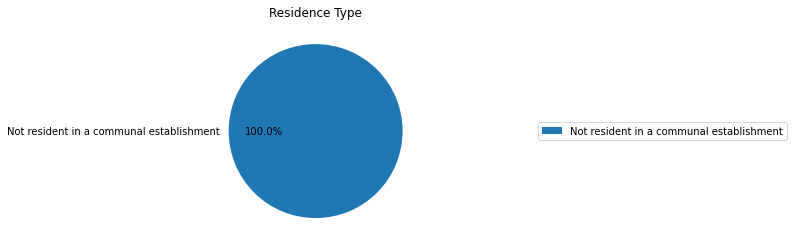

In [30]:
residence_type=[417962]
label=['Not resident in a communal establishment']
plt.pie(residence_type, labels=label, autopct='%1.1f%%')
plt.title('Residence Type')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));


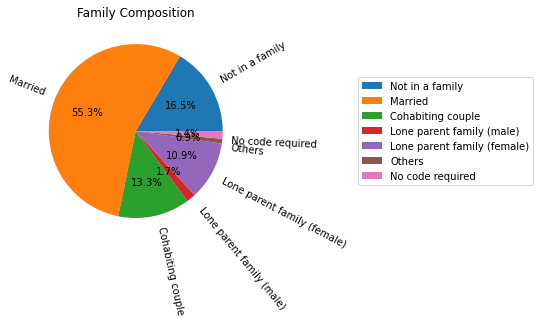

In [48]:
family_composition=[68955, 231024, 55783, 7171,45376, 3720, 5933]
label=['Not in a family', 'Married', 'Cohabiting couple', 'Lone parent family (male)', 'Lone parent family (female)', 'Others', 'No code required']
plt.pie(family_composition, labels=label, rotatelabels=180,autopct='%1.1f%%')
plt.title('Family Composition')
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5));

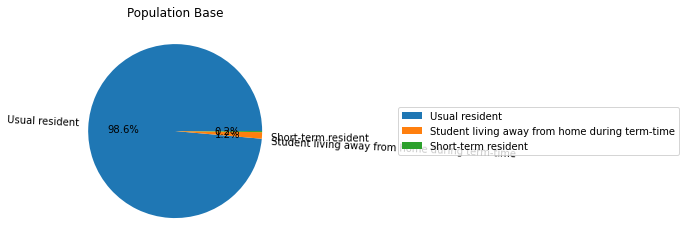

In [49]:
population_base=[412081, 5049, 832]
label=['Usual resident', 'Student living away from home during term-time', 'Short-term resident']
plt.pie(population_base, labels=label,rotatelabels=180, autopct='%1.1f%%')
plt.title('Population Base')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

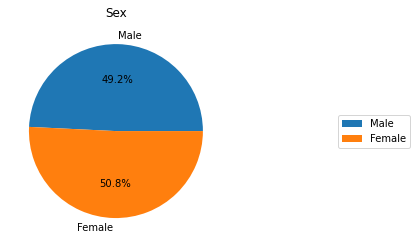

In [51]:
sex=[205771, 212191]
label=['Male', 'Female']
plt.pie(sex, labels=label, autopct='%1.1f%%')
plt.title('Sex')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

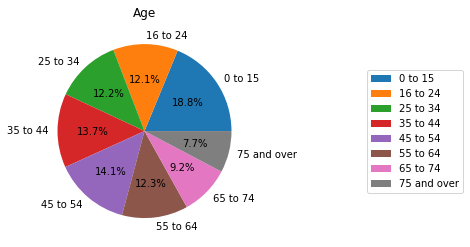

In [34]:
age=[78466, 50399,51025,57460, 58727,51224, 38408, 32253]
label=['0 to 15', '16 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 to 74', '75 and over']
plt.pie(age, labels=label, autopct='%1.1f%%')
plt.title('Age')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

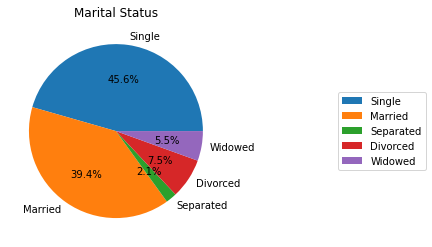

In [35]:
marital_status=[190428,164678, 8582, 31188,23086]
label=['Single', 'Married', 'Separated', 'Divorced', 'Widowed']
plt.pie(marital_status, labels=label, autopct='%1.1f%%')
plt.title('Marital Status')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

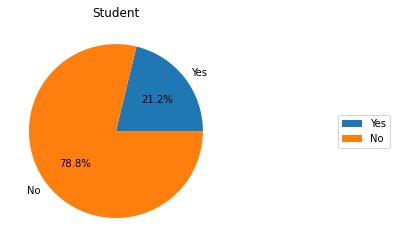

In [36]:
student=[88602, 329360]
label=['Yes', 'No']
plt.pie(student, labels=label, autopct='%1.1f%%')
plt.title('Student')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

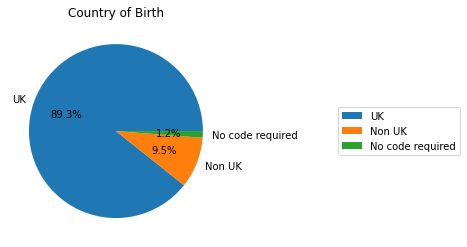

In [37]:
country_of_birth=[373267,39594,5101]
label=['UK', 'Non UK', 'No code required']
plt.pie(country_of_birth, labels=label,autopct='%1.1f%%')
plt.title('Country of Birth')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));


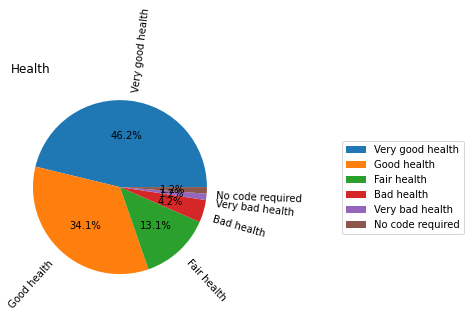

In [54]:
health=[193150,142542, 54818, 17461,4890, 5101]
label=['Very good health', 'Good health', 'Fair health', 'Bad health', 'Very bad health', 'No code required']
plt.pie(health, labels=label,rotatelabels=180, autopct='%1.1f%%')
plt.title('Health', loc='left')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

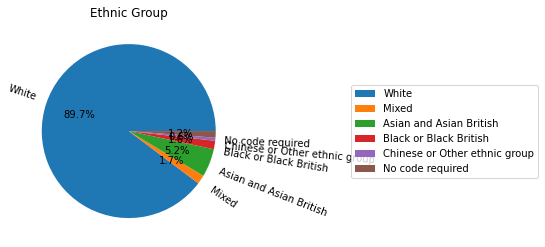

In [55]:
ethnic_group=[375116,6925,21902,6569, 2349,5101]
label=['White', 'Mixed', 'Asian and Asian British', 'Black or Black British', 'Chinese or Other ethnic group', 'No code required']
plt.pie(ethnic_group, labels=label,rotatelabels=180, autopct='%1.1f%%')
plt.title('Ethnic Group')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

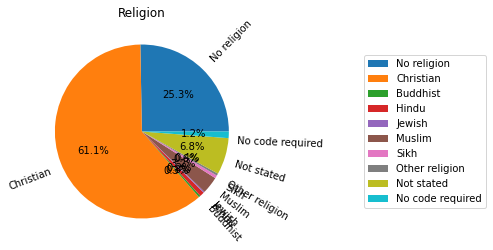

In [56]:
religion=[105651,255457,1440,3493,929,13353,2313,1686,28539,5101]
label=['No religion', 'Christian', 'Buddhist', 'Hindu', 'Jewish', 'Muslim', 'Sikh', 'Other religion', 'Not stated', 'No code required']
plt.pie(religion, labels=label,rotatelabels=180, autopct='%1.1f%%')
plt.title('Religion')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

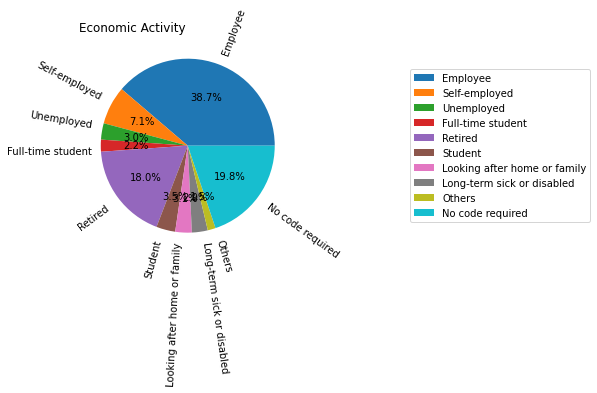

In [58]:
economic_activity=[161912,29752,12656,9326,75415,14747,12856,12303,6138,82857]
label=['Employee', 'Self-employed', 'Unemployed', 'Full-time student', 'Retired', 'Student', 'Looking after home or family', 'Long-term sick or disabled', 'Others', 'No code required']
plt.pie(economic_activity, labels=label,rotatelabels=180, autopct='%1.1f%%')
plt.title('Economic Activity', loc='left')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

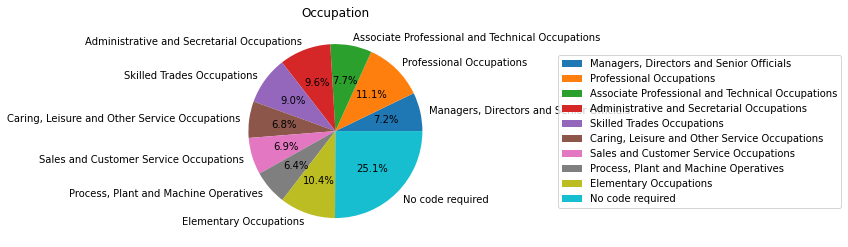

In [44]:
occupation=[29972,46271,32183, 40042,37458,28348,28654,26902,43344,104788]
label=['Managers, Directors and Senior Officials', 'Professional Occupations', 'Associate Professional and Technical Occupations', 'Administrative and Secretarial Occupations', 'Skilled Trades Occupations', 'Caring, Leisure and Other Service Occupations', 'Sales and Customer Service Occupations', 'Process, Plant and Machine Operatives', 'Elementary Occupations', 'No code required']
plt.pie(occupation, labels=label, autopct='%1.1f%%')
plt.title('Occupation')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

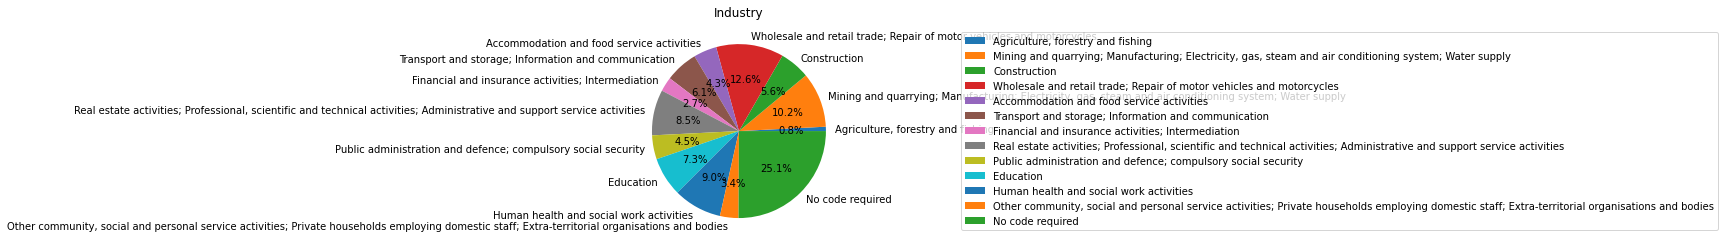

In [45]:
industry=[3363, 42810,23494, 52468,18034,25467,11219,35414,18614,30371,37540,14380,104788]
label=['Agriculture, forestry and fishing', 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply', 'Construction', 'Wholesale and retail trade; Repair of motor vehicles and motorcycles', 'Accommodation and food service activities', 'Transport and storage; Information and communication', 'Financial and insurance activities; Intermediation', 'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities', 'Public administration and defence; compulsory social security', 'Education', 'Human health and social work activities', 'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies', 'No code required']
plt.pie(industry, labels=label, autopct='%1.1f%%')
plt.title('Industry')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

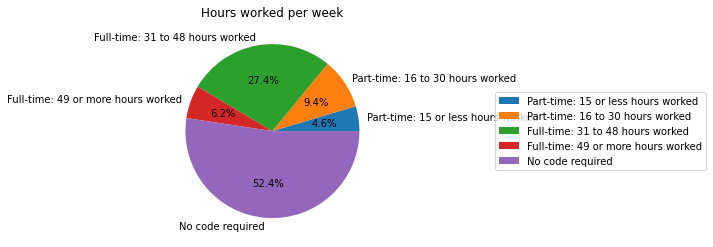

In [46]:
hours_worked_per_week=[19297,39469,114512,25727,218958]
label=['Part-time: 15 or less hours worked', 'Part-time: 16 to 30 hours worked', 'Full-time: 31 to 48 hours worked', 'Full-time: 49 or more hours worked', 'No code required']
plt.pie(hours_worked_per_week, labels=label, autopct='%1.1f%%')
plt.title('Hours worked per week')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));

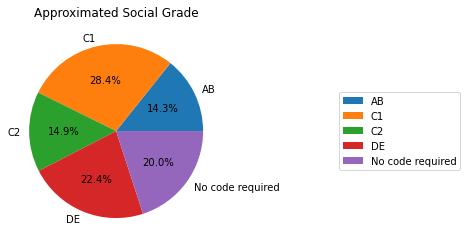

In [47]:
approximated_social_grade=[59654,118771,62125,93807,83604]
label=['AB', 'C1', 'C2', 'DE', 'No code required']
plt.pie(approximated_social_grade, labels=label, autopct='%1.1f%%')
plt.title('Approximated Social Grade')
plt.legend(loc='center left', bbox_to_anchor=(1.5,0.5));